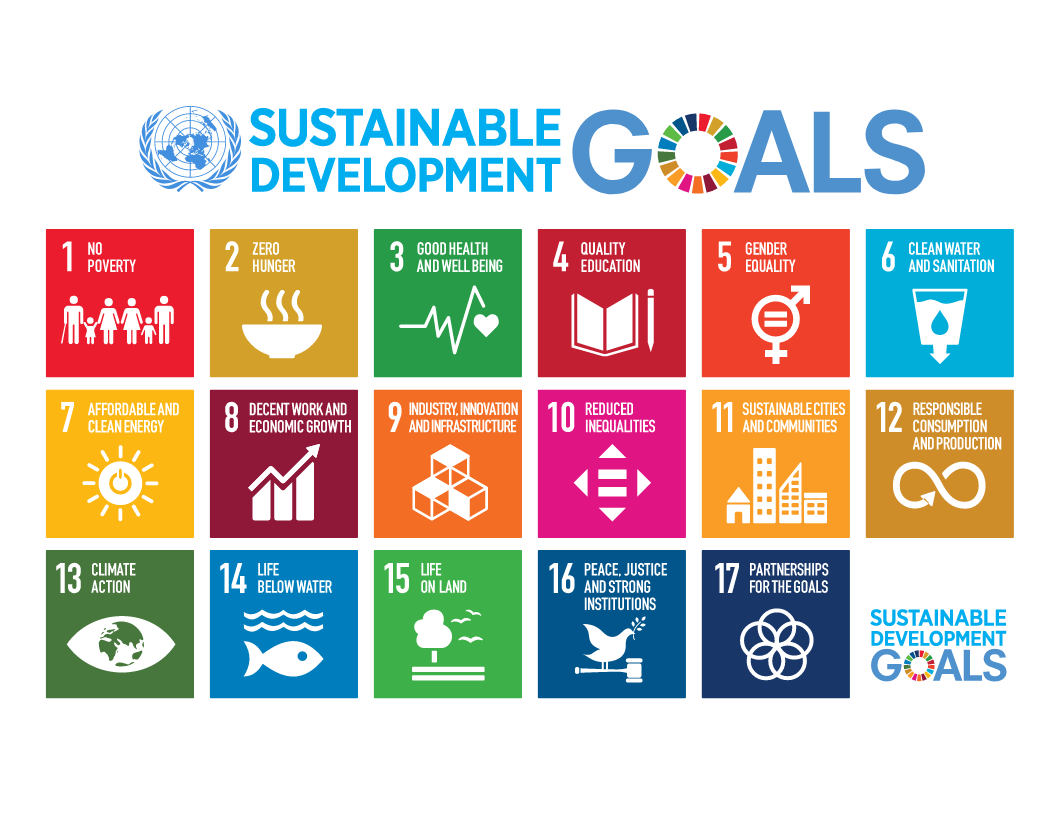

---
---
<a id="cont"></a>

## Table of Contents
---
---



<a href=#one>1. Team Members</a>

<a href=#two>2. Predict Overview</a>

<a href=#three>3. Introduction</a>

<a href=#four>4. Problem Statement</a>

<a href=#five>5. Aims & Objectives</a>

<a href=#six>6. Literature Review</a>

<a href=#seven>7. Importing Packages</a>

<a href=#eight>8. Loading Data</a>

<a href=#nine>9. Data preprocessing </a>

<a href=#ten>10. Exploratory Data Analysis (EDA)</a>

<a href=#eleven>11. Modeling</a>

<a href=#twelve>12. Model Performance/Evaluation</a>

<a href=#thirteen>13. Conclusion</a>

<a href=#fourteen>14. References</a>

<a id="one"></a>
## 1. Team Members
<a href=#cont>Back to Table of Contents</a>

- Marshal Moses
- Oswald Cedric SYENI
- Rachael Njuguna
- Adetunji Emmanuel
- Adeh Odu
- Tochukwu Ezeokafor
- Macmatthew Ahaotu

<a id="two"></a>
## 2. Predict Overview
<a href=#cont>Back to Table of Contents</a>

<a id="three"></a>
## 3. Introduction
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
## 4. Problem Statement 
<a href=#cont>Back to Table of Contents</a>




The Tean is challenge with the task of developing classification model that will accurately predict or classify a given text based or the seventeen Sustainable Development Goals. To achieve solve this classification problem the following steps are required.

1. Analyse the supplied data;
2. Identify errors in the data and perform cleanning on the data set;
3. Determine if additional features can be added to enrich the data set;
4. Develop classification models and evaluate their accuracy;
5. Determine what features were most important in the model’s prediction decision.
6. Explain the model to a non-technical audience.

<a id="five"></a>
## 5. Aims & Objectives
<a href=#cont>Back to Table of Contents</a>

### Aims
- The aim of the Predict is to accurately model the Sustainable Development goals  of the UN based on their text data.

### Specific Objectives
- Explanatory Data Analysis of the dataset provided.
- Data Preprocessing and Feature Engineering.
- Applying of different Classification models.
- Model Evaluaion and Explanation.


<a id="six"></a>
## 6. Literature Review
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Importing Packages
<a href=#cont>Back to Table of Contents</a>

### Installation of Required Libraries
Below are the installation codes for the required Libraries that were probably not pre-installed with Anaconda, to install any of the libraries just delete the "#" sign at the beginning of code.

In [12]:
#conda install -c conda-forge wordcloud

In [13]:
#!pip install pipelinehelper

In [14]:
#!pip install comet_ml

In [15]:
# Import the basic libraries 
import numpy as np
import pandas as pd

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
import unicodedata
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import itertools
import pickle

# Classification Models
import xgboost
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Performance Evaluation
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Set plot style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Wordcloud
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


<a id="eight"></a>
## 8. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [16]:
df = pd.read_csv("train.csv") # load train dataset
test = pd.read_csv("test.csv") # load test dataset

<a id="nine"></a>
## 9. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

### Overview of the Dataset
A brief overview of the dataset is carried below to give an insight of the required data preprocessing which is done to ease the EDA process and get valuable information.

In [17]:
df # Train dataset

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,Indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,Manufacturing value added as a percentage of G...,9,0,3,1.000000,2
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,To Share or Not to Share: That is the Question...,5,2,7,0.555556,3
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"As of 2004, parents can work without losing th...",4,2,2,0.000000,4
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,A question of considerable policy relevance is...,10,1,4,0.600000,5
...,...,...,...,...,...,...,...,...
25939,10.18356/2d07fa8a-en,eb5757e9da9a0b61a2d8a2bd352f34ce,"But, in general, such programmes neither targe...",2,0,3,1.000000,25940
25940,10.18356/daadf51f-en,2bdeee9dff95a4a110cbb75648582558,"Concentration of refugees in remote camps, as ...",4,1,8,0.777778,25941
25941,10.1787/9789264235151-4-en,0754b035be2628e9a06afea711a04fec,Designating 3.8 million ha for rice production...,2,0,9,1.000000,25942
25942,10.1787/9789264209138-3-en,7dae9220a2463cc1d2b2513c032317a8,Figure 1.1 proposes a simplified framework tha...,6,1,2,0.333333,25943


In [18]:
test # Test dataset

,doi,text_id,text,labels_negative,labels_positive,agreement,id
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,Nearly 3 out of 10 adults in these countries p...,1,4,0.600000,1
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,As urban areas become denser and rely more on ...,0,4,1.000000,2
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,Women who work outside their homes need to pro...,0,9,1.000000,3
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,The key governance bodies of this systemic res...,3,3,0.000000,4
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,"In terms of policies, the change of focus from...",0,3,1.000000,5
...,...,...,...,...,...,...,...
6482,10.1787/9789264245174-7-en,02579676203f96c0f00f3ae4cdcf53e8,"However, their implementation highlights an im...",1,2,0.333333,6483
6483,10.1787/5jz159228n6j-en,eeb62198ef591a46faf64804b10e2a3e,The drawback is that they may provide weak inc...,1,3,0.500000,6484
6484,10.18356/5aeb0eab-en,f2e8f01bdc8b6f6c63920e1ac9d598af,"However, the pace of decline has fallen behind...",0,3,1.000000,6485
6485,10.1787/9789264280359-3-en,d44c6b026755f05a64081a203626f7fe,"For instance, the lack of gender-specific goal...",0,9,1.000000,6486


### Text Preprocessing
Remove 'noisy entities' such as URL's, punctuations, mentions, rts and extra white space.and extra white space. The data is further normalized by converting all letters to lowercase.

In [19]:
def clean(df):
    
    """Converts apostrophe suffixes to words, replace webpage links with url, annotate hashtags and mentions, remove a selection of punctuation, and convert all words to lower case.
    Args:
        df (DataFrame): dataframe containing 'text' column to convert
    Returns:
        df (DataFrame): dataframe with converted 'text' column 
    """
    # Remove username
    df['text'] = df['text'].str.replace('@[a-zA-Z0-9_]+','',regex =True)
    # Remove Url
    df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',regex =True)
    # Remove special characters
    df['text'] = df['text'].str.replace('[.%+*/0-9?&#]+','',regex = True)
    # Remove words with 2 or fewer letters
    df['text'] = df['text'].str.replace(r'\b\w{1,2}\b', '', regex =True)
    # Remove special characters
    df['text'] = df['text'].str.replace('([-,]+)|((\')+)|([;:()!@#=$]+)','',regex =True)
    # convert strings into lower case
    df['text'] = df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
    # Removing stop words
    df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords.words('english')))
    return df

In [20]:
df_cln = clean(df)
# applying the preprocessing function on the dataset
df_cln

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators targets data available globally ene...,9,4,5,0.111111,1
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added percentage gdp stood...,9,0,3,1.000000,2
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,"share share question"" volume gender politics f...",5,2,7,0.555556,3
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,parents work without losing entitlement parent...,4,2,2,0.000000,4
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,question considerable policy relevance extent ...,10,1,4,0.600000,5
...,...,...,...,...,...,...,...,...
25939,10.18356/2d07fa8a-en,eb5757e9da9a0b61a2d8a2bd352f34ce,general programmes neither target reach poor t...,2,0,3,1.000000,25940
25940,10.18356/daadf51f-en,2bdeee9dff95a4a110cbb75648582558,concentration refugees remote camps kenya may ...,4,1,8,0.777778,25941
25941,10.1787/9789264235151-4-en,0754b035be2628e9a06afea711a04fec,designating million rice production exclusivel...,2,0,9,1.000000,25942
25942,10.1787/9789264209138-3-en,7dae9220a2463cc1d2b2513c032317a8,figure proposes simplified framework summarise...,6,1,2,0.333333,25943


### Parts of speech tagging and lemmatization
In this step we tokenize the tweets before performing POS tagging on each word followed by lemmatization.

In lemmatization, we reduce the word into dictionary root form. For instance "ships" is converted into "ship". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

In [21]:
def tokenizer(df):
        
    """Tokenize and lemmatize text.
    Args:
        df (DataFrame): dataframe containing 'text' column to convert
    Returns:
        df (DataFrame): dataframe with converted 'text' column into lemmatized column  
    """ 
    
    df['tokenized'] = df['text'].apply(word_tokenize)
    
    ### POS TAGGING BEGIN
    
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    lemmatizer = WordNetLemmatizer() # set lemmatizer
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']] 
    return df

In [22]:
df_tok = tokenizer(df_cln)
df_tok.head() # preview of tokenized data

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,tokenized,pos_tags,lemmatized
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators targets data available globally ene...,9,4,5,0.111111,1,"[indicators, targets, data, available, globall...","[(indicators, n), (targets, n), (data, v), (av...",indicator target data available globally energ...
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added percentage gdp stood...,9,0,3,1.000000,2,"[manufacturing, value, added, percentage, gdp,...","[(manufacturing, v), (value, n), (added, v), (...",manufacture value add percentage gdp stand per...
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,"share share question"" volume gender politics f...",5,2,7,0.555556,3,"[share, share, question, '', volume, gender, p...","[(share, n), (share, n), (question, n), ('', n...",share share question '' volume gender politics...
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,parents work without losing entitlement parent...,4,2,2,0.000000,4,"[parents, work, without, losing, entitlement, ...","[(parents, n), (work, v), (without, n), (losin...",parent work without lose entitlement parental ...
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,question considerable policy relevance extent ...,10,1,4,0.600000,5,"[question, considerable, policy, relevance, ex...","[(question, n), (considerable, a), (policy, n)...",question considerable policy relevance extent ...


<a id="ten"></a>
## 10. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations 
on data so as to discover patterns,to spot anomalies,to test hypothesis 
and to check assumptions with the help of summary statistics and graphical representations.

### Objective of EDA 
The objective of EDA is to determine whether a predictive model is a feasible analytical tool for business challenges or not, 
EDA helps data scientists gain an understanding of the data set beyond the formal modeling or hypothesis testing task. 
It is essential for any research analysis, so as to gain insights into a data set.

### Types of EDA
Univariate EDA is the analysis of one variable while Multivariate EDA is the analysis of more than one variables.


### EDA can be conducted in the following ways:

Univariate:-
- i. non-graphical:- This is the simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.
- ii. graphical:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.

Multivariate:-
- i. non-graphical:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.
- ii. graphical:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### Basic Analysis


In [23]:
df_train = df_tok.copy()
df_train.head() # data preview

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,tokenized,pos_tags,lemmatized
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators targets data available globally ene...,9,4,5,0.111111,1,"[indicators, targets, data, available, globall...","[(indicators, n), (targets, n), (data, v), (av...",indicator target data available globally energ...
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added percentage gdp stood...,9,0,3,1.000000,2,"[manufacturing, value, added, percentage, gdp,...","[(manufacturing, v), (value, n), (added, v), (...",manufacture value add percentage gdp stand per...
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,"share share question"" volume gender politics f...",5,2,7,0.555556,3,"[share, share, question, '', volume, gender, p...","[(share, n), (share, n), (question, n), ('', n...",share share question '' volume gender politics...
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,parents work without losing entitlement parent...,4,2,2,0.000000,4,"[parents, work, without, losing, entitlement, ...","[(parents, n), (work, v), (without, n), (losin...",parent work without lose entitlement parental ...
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,question considerable policy relevance extent ...,10,1,4,0.600000,5,"[question, considerable, policy, relevance, ex...","[(question, n), (considerable, a), (policy, n)...",question considerable policy relevance extent ...


In [24]:
test.head()

,doi,text_id,text,labels_negative,labels_positive,agreement,id
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,Nearly 3 out of 10 adults in these countries p...,1,4,0.6,1
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,As urban areas become denser and rely more on ...,0,4,1.0,2
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,Women who work outside their homes need to pro...,0,9,1.0,3
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,The key governance bodies of this systemic res...,3,3,0.0,4
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,"In terms of policies, the change of focus from...",0,3,1.0,5


In [25]:
df.describe()

,sdg,labels_negative,labels_positive,agreement,id
count,25944.000000,25944.000000,25944.000000,25944.000000,25944.000000
mean,6.530373,1.549183,5.153369,0.694309,12972.500000
std,3.955375,8.190231,12.324176,0.315453,7489.532028
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,3.000000,0.333333,6486.750000
50%,6.000000,1.000000,4.000000,0.777778,12972.500000
75%,9.000000,2.000000,8.000000,1.000000,19458.250000
max,15.000000,837.000000,925.000000,1.000000,25944.000000


In [26]:
test.describe()

,labels_negative,labels_positive,agreement,id
count,6487.000000,6487.000000,6487.000000,6487.00000
mean,1.477879,5.190227,0.691274,3244.00000
std,2.553727,15.443506,0.317414,1872.77993
min,0.000000,0.000000,0.000000,1.00000
25%,0.000000,3.000000,0.333333,1622.50000
50%,1.000000,4.000000,0.777778,3244.00000
75%,2.000000,8.000000,1.000000,4865.50000
max,106.000000,882.000000,1.000000,6487.00000


In [27]:
print(df_train.shape)
print(test.shape)

(25944, 11)
(6487, 7)


In [28]:
df_train.dtypes

doi                 object
text_id             object
text                object
sdg                  int64
labels_negative      int64
labels_positive      int64
agreement          float64
id                   int64
tokenized           object
pos_tags            object
lemmatized          object
dtype: object

Checking the data types helps to find out what data types the data has, 
and like we know machine learning cannot work with objects so at some point in the datapoint
we will find a way to convert it to numeric data which the machine accepts.

In [29]:
(15819) / (15819 + 10546)

0.6

In [30]:
(10546) / (15819 + 10546)

0.4

We had to check for the percentage duplicate so as to establish wether there are text duplicates.

In [31]:
# Looking for duplicates
percent_duplicates = round((1-(df_train['text'].nunique()/len(df_train['text'])))*100,2)
print(percent_duplicates,'%')

0.01 %


The main idea about the measure of dispersion is to get to know how the data are spread. As the name suggests, 
the measure of dispersion shows the scatterings of the data. It also tells the variation of the data from one 
another and gives a clear idea about the distribution of the data.

In [32]:
df_train.describe() # checking for measures of dispersion

,sdg,labels_negative,labels_positive,agreement,id
count,25944.000000,25944.000000,25944.000000,25944.000000,25944.000000
mean,6.530373,1.549183,5.153369,0.694309,12972.500000
std,3.955375,8.190231,12.324176,0.315453,7489.532028
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,3.000000,0.333333,6486.750000
50%,6.000000,1.000000,4.000000,0.777778,12972.500000
75%,9.000000,2.000000,8.000000,1.000000,19458.250000
max,15.000000,837.000000,925.000000,1.000000,25944.000000


Here we checked the value Count for the sdg

In [33]:
df_train['sdg'].value_counts() # checking for unique value count for the target variable

5     3438
4     2999
7     2473
6     2247
1     2190
3     2132
2     1963
11    1798
13    1695
8     1218
14     917
9      873
10     843
15     785
12     373
Name: sdg, dtype: int64

We also checked the unique values which gives the number of unique (distinct) values in a column. 
And from what is seen the tweetid has a high level of cardinality thus it does no contribute to the main aim of the data.

In [34]:
len(df['id'].unique()) # checking for unique values for id

25944

### Graphical Univariate


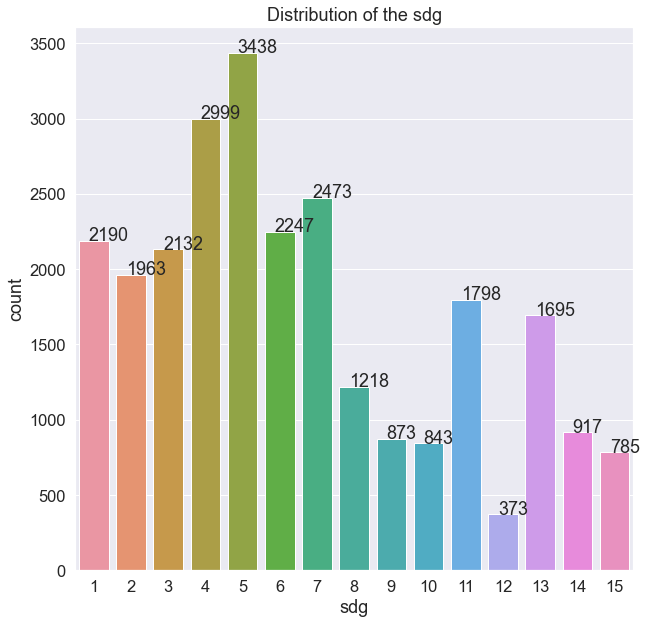

In [35]:
# A visual check of the distribution of the sdg between the classes
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,10))
graph = sns.countplot(ax=ax1,x='sdg', data=df_train)
graph.set_xticklabels(graph.get_xticklabels())
plt.title("Distribution of the sdg")
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/3., height + 0.1,height)

Above is a Barchart representing the distribution of sdg .From the Bar chart we can tell that sdg 5 have a highest column.

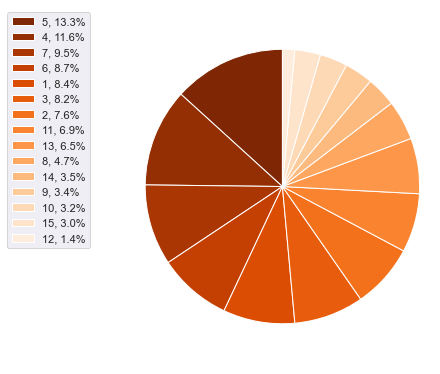

In [36]:
df_copy = df_train.copy()

# Labeling the target
df_copy ['sdg'] = [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
                   [x-1] for x in df_copy['sdg']]

# Checking the numerical distribution using a Pie Chart
sdg = df_copy['sdg'].value_counts()/df_copy.shape[0]
labels = (df_copy['sdg'].value_counts()/df_copy.shape[0]).index
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('Oranges_r', 128)
ax1.set_prop_cycle("color", [theme(1. * i / len(sdg)) for i in range(len(sdg))])

_, _ = ax1.pie(sdg, startangle=90)

ax1.axis('equal')

total = sum(sdg)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sdg)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

### Graphical Multivariate
Multivariate graphs display the relationships among three or more variables.

The use of preprocessed data in Word Cloud makes it easy to identify the relevant words as opposed to many 
instances of https and other types of noise. 

### WHAT IS WORD CLOUD
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, 
the more often it’s mentioned within a given text and the more important. It also known as tag clouds or text clouds, 
these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases.

Below are the codes that generates the world cloud for the different sdg in out dataset.

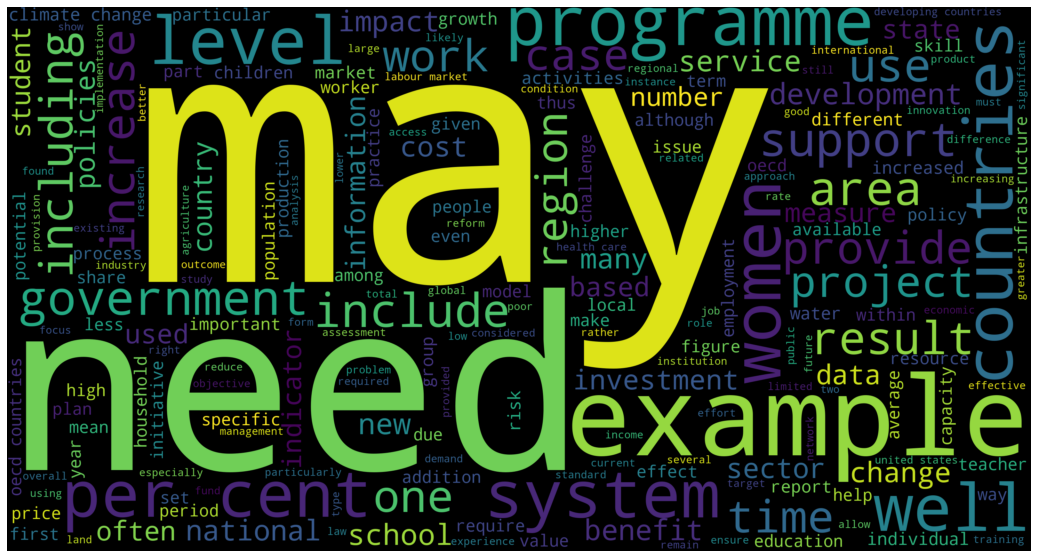

<Figure size 432x288 with 0 Axes>

In [37]:
# Most occurring words of the train set
words_train=" ".join([tweet for tweet in df_train['text']])
wordcloud = WordCloud(background_color='black',width=3200, height=1700,random_state=46).generate(words_train)

# Displaying the word cloud image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('./World_cloud.png',dpi=300)

<a id="eleven"></a>
## 11. Modeling
<a href=#cont>Back to Table of Contents</a>

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following models will be considered:

- Random forest
- Naive Bayes
- K nearest neighbors
- Logistic regression
- Support vector machine (SVM OR SVC)
- Linear SVC
- Xgboost
- SGD Classifier
- Adaboost
- Decision tree

### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [38]:
# Seperate features and target variables
X = df_tok['lemmatized']
y = df_tok['sdg']

# Create train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipelines

Pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF or Count vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [39]:
def model(models, X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models
    Args:
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    Returns:
        DataFrame of predictions
    '''
    
    dfs = []
    results = []
    names = []
    target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True) # splitting the data into kfolds
        cv_results = cross_validate(model, X_train, y_train, cv=kfold)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        print('F1_SCORE:', f1_score(y_test, y_pred, average= 'weighted'))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [40]:
LogReg = Pipeline([('Count',CountVectorizer()),('classify', LogisticRegression())])
RF = Pipeline([('Count',CountVectorizer()),('classify', RandomForestClassifier())])
KNN = Pipeline([('Count',CountVectorizer()),('classify', KNeighborsClassifier())])
MULT = Pipeline([('Count',CountVectorizer()),('classify',MultinomialNB())])
SVM = Pipeline([('Count',CountVectorizer()),('classify', SVC())])
LINSVM = Pipeline([('Count',CountVectorizer()),('classify', LinearSVC())])
DT = Pipeline([('Count',CountVectorizer()),('classify', DecisionTreeClassifier(random_state=42))])
SGD = Pipeline([('Count',CountVectorizer()),('classify', SGDClassifier())])
ADB = Pipeline([('Count',CountVectorizer()),('classify', AdaBoostClassifier(random_state=42))])

In [41]:
# base model using count vectorizer 
model_base = [
        ('LogReg', LogReg), 
        ('RF', RF),
        ('KNN', KNN),
        ('MULT', MULT),
        ('SVM', SVM),
        ('LINSVM', LINSVM),
        ('DT', DT),
        ('SGD', SGD),
        ('ADB', ADB)
        ]

In [42]:
modelled = model(model_base, X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           1       0.62      0.68      0.65       424
           2       0.72      0.74      0.73       405
           3       0.87      0.81      0.84       454
           4       0.78      0.83      0.80       561
           5       0.77      0.82      0.79       669
           6       0.75      0.71      0.73       479
           7       0.74      0.77      0.76       502
           8       0.48      0.44      0.46       228
           9       0.62      0.54      0.58       182
          10       0.48      0.41      0.44       179
          11       0.75      0.76      0.75       374
          12       0.56      0.38      0.45        82
          13       0.70      0.73      0.71       302
          14       0.83      0.79      0.81       189
          15       0.61      0.56      0.58       159

    accuracy                           0.72      5189
   macro avg       0.69      0.66      0.67      5189
weighted avg       

ADB
              precision    recall  f1-score   support

           1       0.59      0.51      0.54       424
           2       0.62      0.53      0.57       405
           3       0.80      0.65      0.72       454
           4       0.72      0.78      0.75       561
           5       0.81      0.67      0.73       669
           6       0.74      0.66      0.70       479
           7       0.79      0.57      0.66       502
           8       0.36      0.29      0.32       228
           9       0.56      0.23      0.32       182
          10       0.57      0.18      0.28       179
          11       0.24      0.76      0.36       374
          12       0.37      0.34      0.35        82
          13       0.67      0.55      0.60       302
          14       0.84      0.80      0.82       189
          15       0.66      0.53      0.59       159

    accuracy                           0.59      5189
   macro avg       0.62      0.54      0.55      5189
weighted avg       0.6

### Hyper-parameter tuning using Gridsearch
The model hyper-parmeters are tuned and a TFDIF Vectorizer is also implemented to see if it would improve the overall performance of the model

After the best paramaters were gotten for our models we imlemented the parameters for other models with our previous model() script that was created for multiple result output

In [43]:
# This would take long (more than 10 hours), Fitting 5 folds for each of 8208 candidates, totalling 41040 fits

# skip this if not necessary, but if you choose to continue, remove the quotes from the start and end of the script below

"""

pipe = Pipeline([
    ('vect', PipelineHelper([
        ('count', CountVectorizer()),
        ('tfidf', TfidfVectorizer()),
    ])),
    ('classifier', PipelineHelper([
        ('linsvm', LinearSVC()),
        ('log', LogisticRegression())
        ,
    ])),
])

params = {
    'vect__selected_model': pipe.named_steps['vect'].generate({
        'count__analyzer': ['char', 'word'],
        'count__min_df': [1, 2, 3],
        'count__max_df': [None, 0.3, 0.4],
        'count__ngram_range':[(1, 2), (1, 3), (1, 4), (2, 2)],
        'tfidf__min_df': [1, 2, 3],
        'tfidf__max_df': [None, 0.3, 0.4],
        'tfidf__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 2)],
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'linsvm__C': [0.01, 0.1, 1.0, 10],
        'log__solver': ['liblinear', 'saga'],
        'log__random_state' : [1, 2, 3, 42],
        'log__multi_class' : [None,'ovr','multinomial'],
        'log__penalty': [None, 'l1', 'l2']
    })
}
grid = GridSearchCV(pipe, params, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

"""

"\n\npipe = Pipeline([\n    ('vect', PipelineHelper([\n        ('count', CountVectorizer()),\n        ('tfidf', TfidfVectorizer()),\n    ])),\n    ('classifier', PipelineHelper([\n        ('linsvm', LinearSVC()),\n        ('log', LogisticRegression())\n        ,\n    ])),\n])\n\nparams = {\n    'vect__selected_model': pipe.named_steps['vect'].generate({\n        'count__analyzer': ['char', 'word'],\n        'count__min_df': [1, 2, 3],\n        'count__max_df': [None, 0.3, 0.4],\n        'count__ngram_range':[(1, 2), (1, 3), (1, 4), (2, 2)],\n        'tfidf__min_df': [1, 2, 3],\n        'tfidf__max_df': [None, 0.3, 0.4],\n        'tfidf__ngram_range': [(1, 2), (1, 3), (1, 4), (2, 2)],\n    }),\n    'classifier__selected_model': pipe.named_steps['classifier'].generate({\n        'linsvm__C': [0.01, 0.1, 1.0, 10],\n        'log__solver': ['liblinear', 'saga'],\n        'log__random_state' : [1, 2, 3, 42],\n        'log__multi_class' : [None,'ovr','multinomial'],\n        'log__penalty': [

In [44]:
#Logistic Regression
lr = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', LogisticRegression(random_state=3, 
                                          multi_class='ovr',
                                         solver = 'liblinear'))])
    
#Multinomial Naive Bayes
multi = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                            smooth_idf = True, 
                                            max_df = 0.3,
                                            ngram_range = (1, 2),
                                            stop_words='english')),
                  ('clf', MultinomialNB())])
    
    
    
#Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                         smooth_idf = True, 
                                         max_df = 0.3,
                                         ngram_range = (1, 2),
                                         stop_words='english')),
               ('clf', RandomForestClassifier(n_estimators=100, 
                                              max_depth=2, 
                                              random_state=42, 
                                              class_weight="balanced"))])
    
    
#Support Vector Classifier
svc = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                          smooth_idf = True, 
                                          max_df = 0.3,
                                          ngram_range = (1, 2),
                                          stop_words='english')),
                ('clf', SVC())])
    
    
    
#Linear SVC
linsvc = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                             smooth_idf = True, 
                                             max_df = 0.3,
                                             ngram_range = (1, 2),
                                             stop_words='english')),
                   ('clf', LinearSVC())])
    
    
    
#K Nearest Neighbours Classifier
kn = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', KNeighborsClassifier(n_neighbors=3))])
    
    
    
#Decision Tree Classifier
dt = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', DecisionTreeClassifier(random_state=42))])
    
    
    
#AdaBoost Classifier
ad = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', AdaBoostClassifier(random_state=42))])
    
    
    
#SGD Classifier
sgd = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-3, 
                                      random_state=42, 
                                      max_iter=5, 
                                      tol=None))])

    
#XGBoost
xg = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', xgboost.XGBClassifier())])

In [45]:
# collection of all the models
model_tuned = [
        ('LogReg', lr),
        ('RF', rf),
        ('KNN', kn),
        ('MULT', multi),
        ('SVM', svc),
        ('LINSVM', linsvc),
        ('DT', dt),
        ('SGD', sgd),
        ('ADB', ad),
        ('XGB', xg)
        ]

### Dealing with data imbalance

[('downscaling:', 'type1'),
 ('balanceScaling:', 'type2'),
 ('UpScaling:', 'type3')]

What type of scaling do you want to do >type3
dual-sampling:


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,tokenized,pos_tags,lemmatized
15918,10.1787/5jm0xdx0b06g-en,4931de108df294a1d48d257227eb3be5,strengthen system inform skills policy based c...,5,5,0,1.000000,15919,"[strengthen, system, inform, skills, policy, b...","[(strengthen, n), (system, n), (inform, a), (s...",strengthen system inform skill policy base cur...
4942,10.1787/9789264188945-9-en,23abe69459793609aeb9de7883548482,average beds across small clinics hiranhic des...,3,1,8,0.777778,4943,"[average, beds, across, small, clinics, hiranh...","[(average, a), (beds, n), (across, n), (small,...",average bed across small clinic hiranhic despi...
20933,10.1787/9789264289062-4-en,0033a165843817c6af43ae9e802dd189,last decade particularly since number discharg...,3,0,9,1.000000,20934,"[last, decade, particularly, since, number, di...","[(last, a), (decade, n), (particularly, r), (s...",last decade particularly since number discharg...
18848,10.1787/9789264191808-5-en,09f5b956306225bc7d3d2dd6b5ab1b9a,plans necessarily implemented gore conceivable...,11,1,8,0.777778,18849,"[plans, necessarily, implemented, gore, concei...","[(plans, n), (necessarily, r), (implemented, v...",plan necessarily implement gore conceivable in...
9665,10.18356/9a9b4252-en,63cc3ae3805b5e01af608ffb6754cc92,example india china adjusted customs duty requ...,7,2,7,0.555556,9666,"[example, india, china, adjusted, customs, dut...","[(example, n), (india, a), (china, n), (adjust...",example india china adjust custom duty require...


Class with there new resampled sizes
5     3438
4     3438
7     3438
6     3438
1     3438
3     3438
2     3438
11    3438
13    3438
8     3438
14    3438
9     3438
10    3438
15    3438
12    3438
Name: sdg, dtype: int64


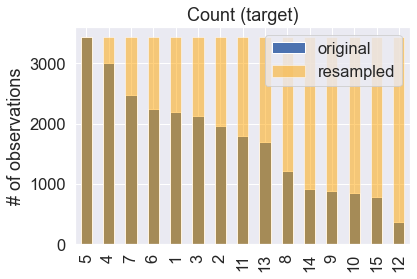

In [49]:
display([('downscaling:', 'type1'), ('balanceScaling:', 'type2'), ('UpScaling:', 'type3')])
keyboard = input('What type of scaling do you want to do >')
if keyboard == 'type1':
    class_size = int(df_tok.sdg.value_counts().min()) # setting an average or fixed size for each category in 'sdg'
elif keyboard == 'type2':
    class_size = int(df_tok.sdg.value_counts().mean()) # setting an average or fixed size for each category in 'sdg'
else:
    class_size = int(df_tok.sdg.value_counts().max()) # setting an average or fixed size for each category in 'sdg'
    
dd = df.sdg.value_counts() # getting category name and their size
appended_data = [] # creating an empty list to append all category after resampling

# Creating a for-loop to resample and append to a list
for index, size in dd.items():
    if size < class_size: # setting condition to check if to downsampling or otherwise
        temp_pd = resample(df_tok[df_tok['sdg']==index],
                          replace=True, # sample with replacement
                          n_samples=class_size, # match number in majority class
                          random_state=27)
    else:
        temp_pd = resample(df_tok[df_tok['sdg']==index],
                          replace=False, # sample with replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in minority class
                          random_state=27)
# Appending each category after resampling
    appended_data.append(temp_pd)

# Creating a new dataframe and viewing
df_sampled = pd.concat(appended_data, axis=0)
print('dual-sampling:')
display(df_sampled.sample(5))
print('Class with there new resampled sizes')
print(df_sampled.sdg.value_counts())

# ploting the old and new graph frequency
ax = df_tok.sdg.value_counts().plot(kind='bar')
df_sampled.sdg.value_counts().plot(kind='bar', title='Count (target)', 
                                               ax=ax,color='orange', alpha=0.5);
plt.xticks(range(len(dd)),dd.index)
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [50]:
# Seperate features and target variables
X = df_sampled['lemmatized']
y = df_sampled['sdg']

# Create train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
tuned = model(model_tuned, X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           1       0.84      0.79      0.82       677
           2       0.85      0.85      0.85       657
           3       0.92      0.93      0.92       654
           4       0.88      0.89      0.88       699
           5       0.82      0.81      0.82       694
           6       0.87      0.85      0.86       683
           7       0.88      0.87      0.87       702
           8       0.87      0.84      0.85       727
           9       0.90      0.92      0.91       704
          10       0.89      0.89      0.89       684
          11       0.85      0.90      0.87       634
          12       0.96      1.00      0.98       686
          13       0.91      0.88      0.89       709
          14       0.94      0.99      0.96       679
          15       0.94      0.93      0.93       725

    accuracy                           0.89     10314
   macro avg       0.89      0.89      0.89     10314
weighted avg       

ADB
              precision    recall  f1-score   support

           1       0.52      0.45      0.48       677
           2       0.53      0.50      0.52       657
           3       0.69      0.72      0.71       654
           4       0.62      0.75      0.68       699
           5       0.68      0.63      0.65       694
           6       0.66      0.67      0.67       683
           7       0.74      0.56      0.63       702
           8       0.45      0.20      0.28       727
           9       0.19      0.68      0.30       704
          10       0.60      0.25      0.35       684
          11       0.65      0.40      0.50       634
          12       0.62      0.51      0.56       686
          13       0.71      0.51      0.59       709
          14       0.84      0.75      0.79       679
          15       0.78      0.57      0.66       725

    accuracy                           0.54     10314
   macro avg       0.62      0.54      0.56     10314
weighted avg       0.6

<a id="twelve"></a>
## 12. Model Performance
<a href=#cont>Back to Table of Contents</a>

To wrap up our analysis, we are going to analyze the data in the final dataframe returned from the model() script.

To obtain better estimates of the distribution of metrics from each model before and after hyper-parameter tuning, we ran an empirical bootstrapping at 30 samples. Additionally, we partitioned the data into two sorts: performance metrics and fit-time metrics. The following block of code achieves this.

In [53]:
def mod_perf(modelled):
    '''
    This script was constructed to avoid repetitive codes for performance analysis.
    Args:
        params modelled: results after using the model() script
    Returns : 
        a tuple contain the test score, fit time, and score time of each model
    
    '''
    bootstraps = []
    for model in list(set(modelled.model.values)):
        model_df = modelled.loc[modelled.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
        
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
    time_metrics = ['fit_time','score_time'] # fit time metrics
    ## PERFORMANCE METRICS
    results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results_long_nofit = results_long_nofit.sort_values(by='values')
    ## TIME METRICS
    results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
    results_long_fit = results_long_fit.sort_values(by='values')
    return (results_long_nofit,results_long_fit)

We now have some robust data to plot and analyze. First, let’s plot our performance metrics from the 5-fold cross validation.

###### Before hyper-parameter tuning

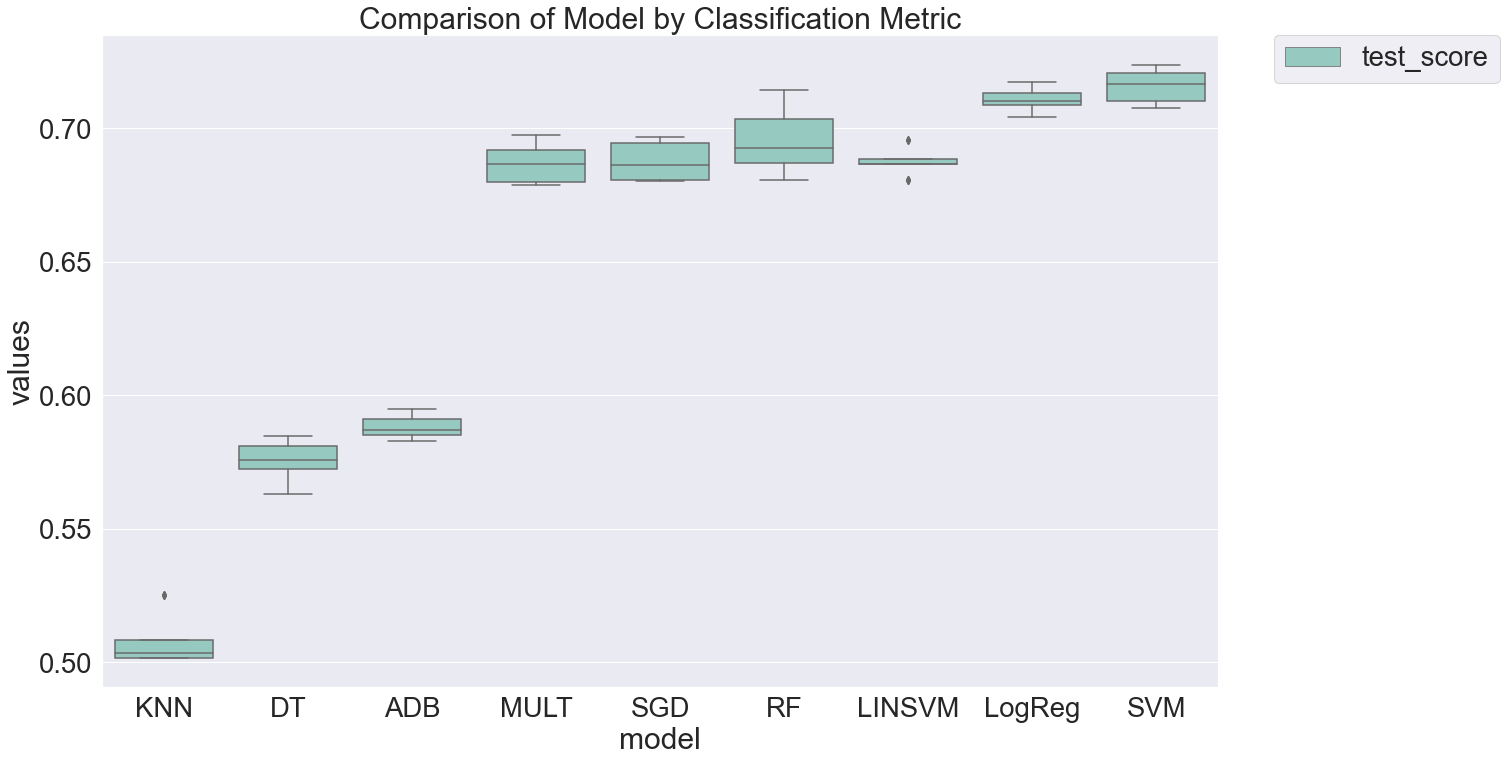

In [54]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(modelled)[0], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

This visual clearly shows that LogisticRegression Classifier and the Support vector machine are the best performing models
with KNN coming in last, which will be looked into futher.

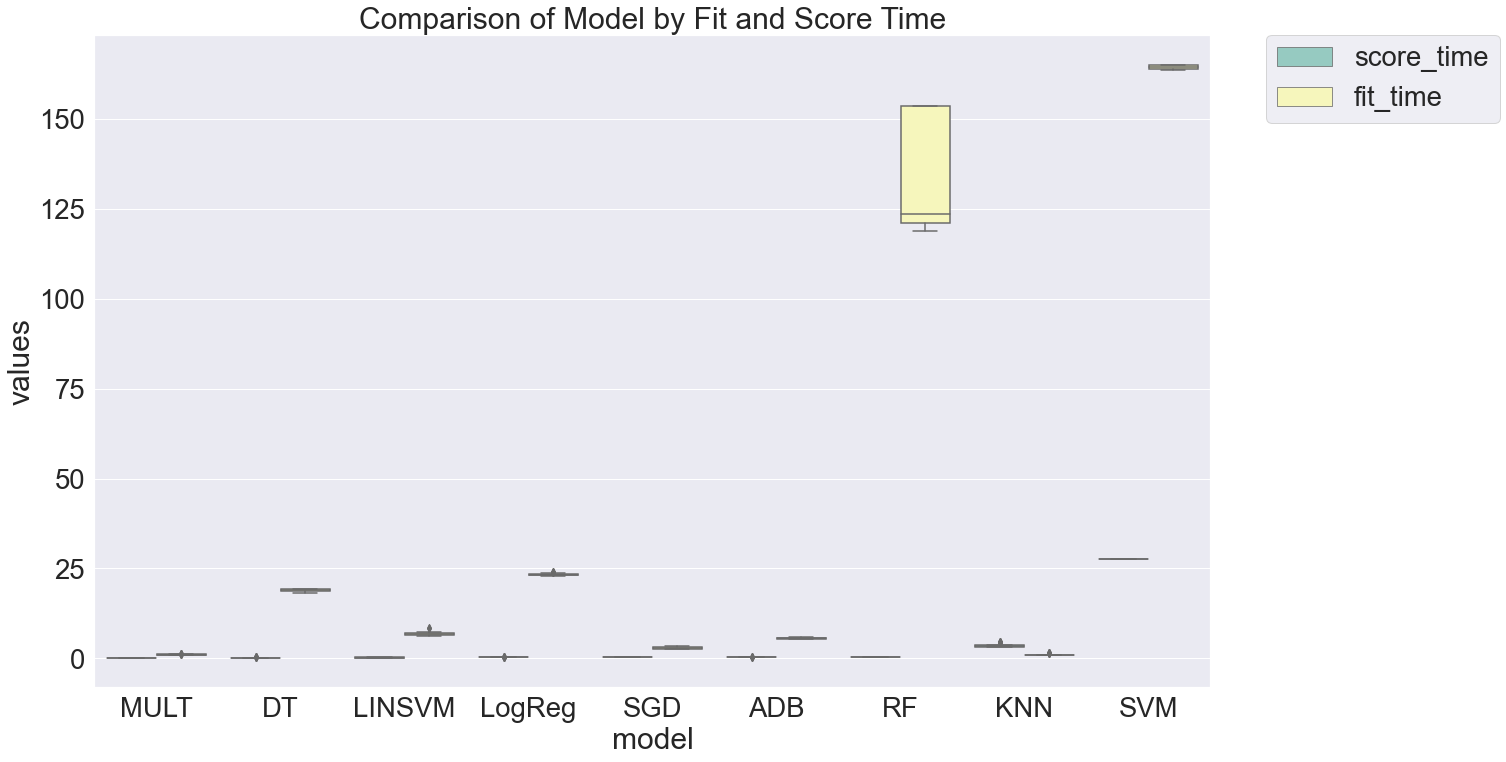

In [56]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(modelled)[1], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

Ironically the two support vector machines are on the opposite sides the hierarchy, with a large gap beween their fit time, thus showing the advantage of the linear SVM over the SVM 
It is not a suprise that the RandomForestClassifier also had a high fit time compared to the rest, mostly due to its nature of operation.

###### After hyper-parameter tuning

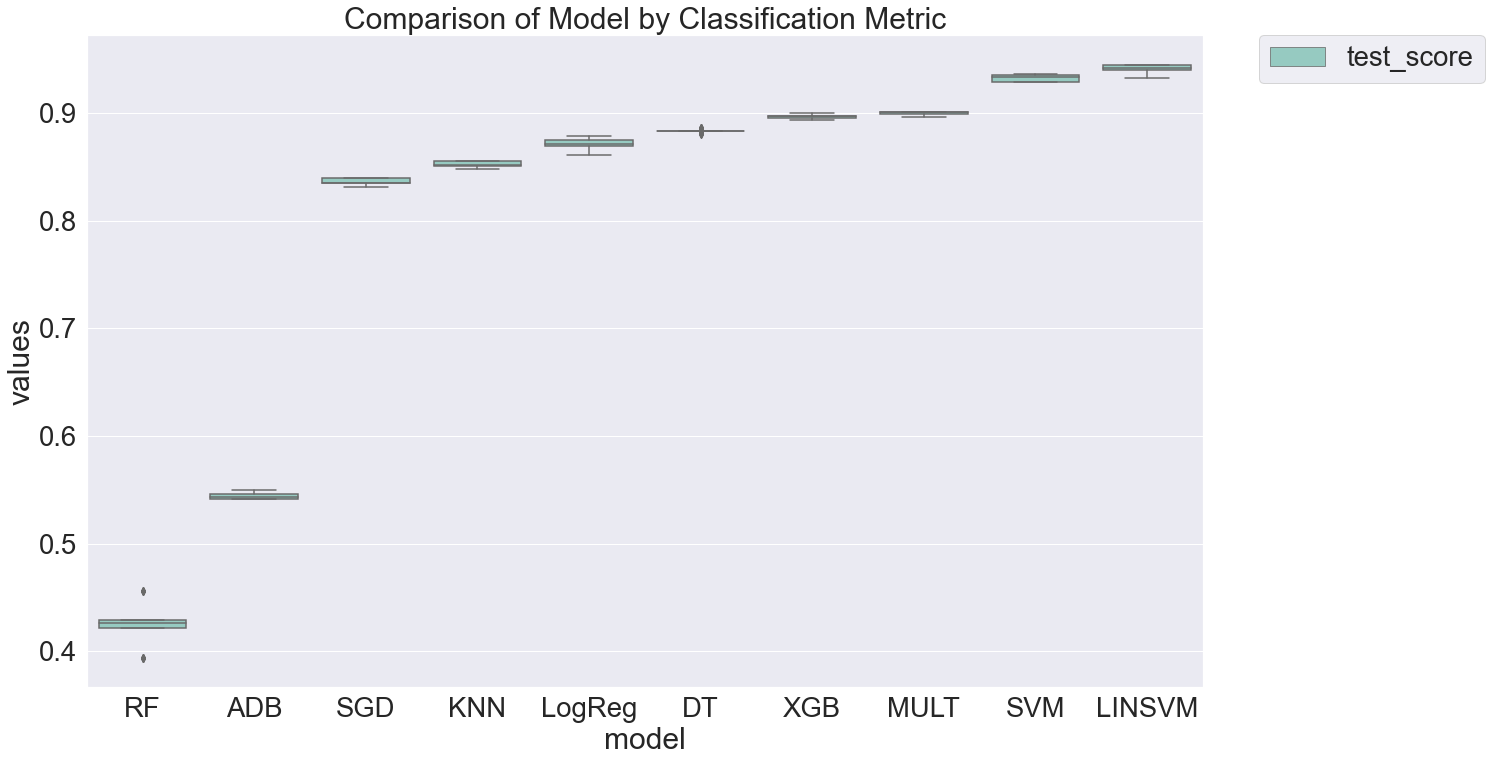

In [57]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(tuned)[0], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

From the above visual you can see that the Support vector machines dominated the chart closely followed by the logistic regression model. The worst performing model was the Random forest classifier. The adaboost, SGD and KNN seem to be on slightly similar levels.
In the next visual we are going to compare the fit-time and score time of the models

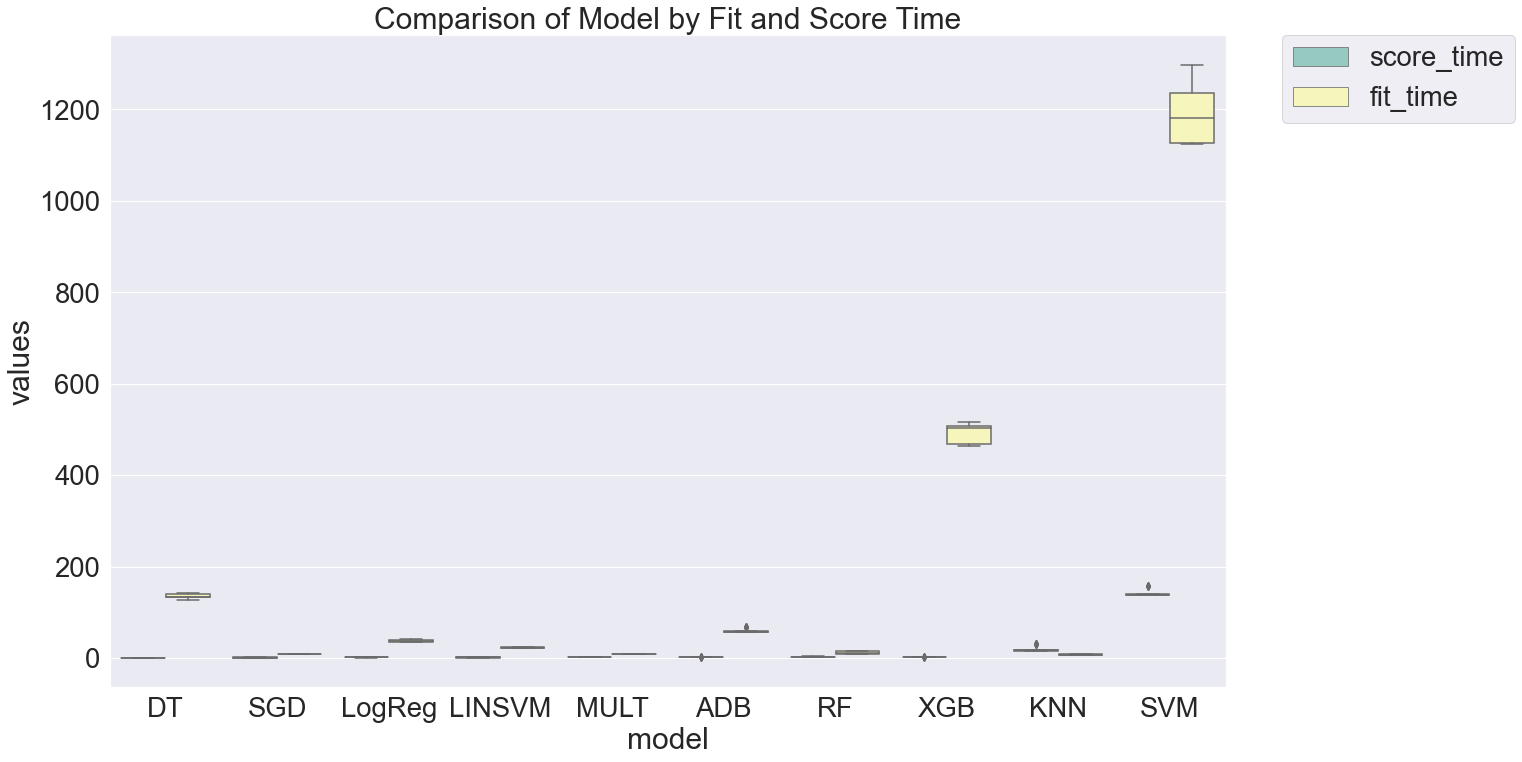

In [58]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(tuned)[1], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

Coincidentally the two support vector machines are on the opposite sides the hierarchy again, with the LinearSVM finishing first with an amazingly low fit and score time and yet giving a great performance metric.

It is interesting to note that XGBoost was far and away the second slowest to train; however, it was the fifth best performing model. We generally see a trade-off in terms of performance and training time. Consider neural networks which require a massive amount of data and time to train, but which generally perform very well.

RandomForest, while relatively fast compared to KNN, and SVM had the poorest performance. If we were to continue refining models, we would likely focus most of our efforts on he Linear SVM because it performed very well with low fit and score time making it our ideal model for this project.

##### Reasons for bad performances of some models
- KNeighborsClassifier(K-NN) had the worst prformance before and after the tuning of the hyperparameters this is because it implements classification based on voting by nearest k-neighbors of target point, this is counter-intuitive in a sdg analysis dataset pulled from twitter because the data is too random and basically has no relation with each other due to it is the emotions of more than 10,000 unique individuals.
- K-NN is a classification algorithm and conceptually one of the simplest to understand. It is also called ‘Lazy Learner’ as against ‘Eager Learner’. Most classification algorithms are eager learners. Training data is used to construct classification models, the model is used for evaluation on test data where data classifications are known. If the evaluated results are satisfactory, the final model is then used for making prediction of classes on data with unknown classifications. Eager learners have, therefore, already done most of their job of model formulation beforehand. A lazy learner, on the other hand, does not build any model beforehand; it waits for the unclassified data and then winds it way through the algorithm to make classification prediction. Lazy learners are, therefore, time consuming–each time a prediction is to be made all the model building effort has to be performed again.

- RandomForestClassifier was surprisingly almost as bad as the KNN, mainly due to overfitting as its f1_score value reduced drastically after hyper-parameter tuning was carried out.
- A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

##### Reasons for good performances of some models
- Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well
- Support Vectors are simply the coordinates of individual observation. The SVM classifier is a frontier that best segregates the two classes (hyper-plane/ line).

- The Logistic regression Classifier is by far the most stable of them all with amazing performances before and after hyper-parameter tuning, its only drawback is the time lag. 
- The Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1
- The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

<a id="thirteen"></a>
## 13. Conclusion
<a href=#cont>Back to Table of Contents</a>


### Submission

In [59]:
test = pd.read_csv('test.csv')
test.head()

,doi,text_id,text,labels_negative,labels_positive,agreement,id
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,Nearly 3 out of 10 adults in these countries p...,1,4,0.6,1
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,As urban areas become denser and rely more on ...,0,4,1.0,2
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,Women who work outside their homes need to pro...,0,9,1.0,3
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,The key governance bodies of this systemic res...,3,3,0.0,4
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,"In terms of policies, the change of focus from...",0,3,1.0,5


In [60]:
test_cln = tokenizer(clean(test))
test_cln.head()

,doi,text_id,text,labels_negative,labels_positive,agreement,id,tokenized,pos_tags,lemmatized
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,nearly adults countries performs lowest level ...,1,4,0.6,1,"[nearly, adults, countries, performs, lowest, ...","[(nearly, r), (adults, a), (countries, n), (pe...",nearly adults country perform low level profic...
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,urban areas become denser rely public transpor...,0,4,1.0,2,"[urban, areas, become, denser, rely, public, t...","[(urban, a), (areas, n), (become, v), (denser,...",urban area become denser rely public transport...
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,women work outside homes need procure range se...,0,9,1.0,3,"[women, work, outside, homes, need, procure, r...","[(women, n), (work, v), (outside, a), (homes, ...",woman work outside home need procure range ser...
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,key governance bodies systemic response govern...,3,3,0.0,4,"[key, governance, bodies, systemic, response, ...","[(key, a), (governance, n), (bodies, n), (syst...",key governance body systemic response governme...
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,terms policies change focus women gender stemm...,0,3,1.0,5,"[terms, policies, change, focus, women, gender...","[(terms, n), (policies, n), (change, v), (focu...",term policy change focus woman gender stem rec...


In [62]:
x_pred  = test_cln['lemmatized']
submission = pd.DataFrame(
    {'id': test['id'],
     'sdg': linsvc.predict(x_pred)
    })
# save DataFrame to csv file for submission
submission.to_csv("Submission.csv", index=False)

In [ ]:
submission

<a id="fourteen"></a>
## 14. References
<a href=#cont>Back to Table of Contents</a>